<a href="https://colab.research.google.com/github/chaymaaaaa/go-my-code-/blob/main/project_phase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [3]:
df=pd.read_csv("/creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
df.dropna(inplace=True)
df.isnull().sum().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5977 entries, 0 to 5978
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5977 non-null   int64  
 1   V1      5977 non-null   float64
 2   V2      5977 non-null   float64
 3   V3      5977 non-null   float64
 4   V4      5977 non-null   float64
 5   V5      5977 non-null   float64
 6   V6      5977 non-null   float64
 7   V7      5977 non-null   float64
 8   V8      5977 non-null   float64
 9   V9      5977 non-null   float64
 10  V10     5977 non-null   float64
 11  V11     5977 non-null   float64
 12  V12     5977 non-null   float64
 13  V13     5977 non-null   object 
 14  V14     5977 non-null   float64
 15  V15     5977 non-null   float64
 16  V16     5977 non-null   float64
 17  V17     5977 non-null   float64
 18  V18     5977 non-null   float64
 19  V19     5977 non-null   float64
 20  V20     5977 non-null   float64
 21  V21     5977 non-null   float64
 22  

In [6]:
df_imputed = df.fillna(df.mean())
print("\nMissing values after imputation:\n", df_imputed.isnull().sum())


Missing values after imputation:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


<ipython-input-6-3e36734de15e>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_imputed = df.fillna(df.mean())


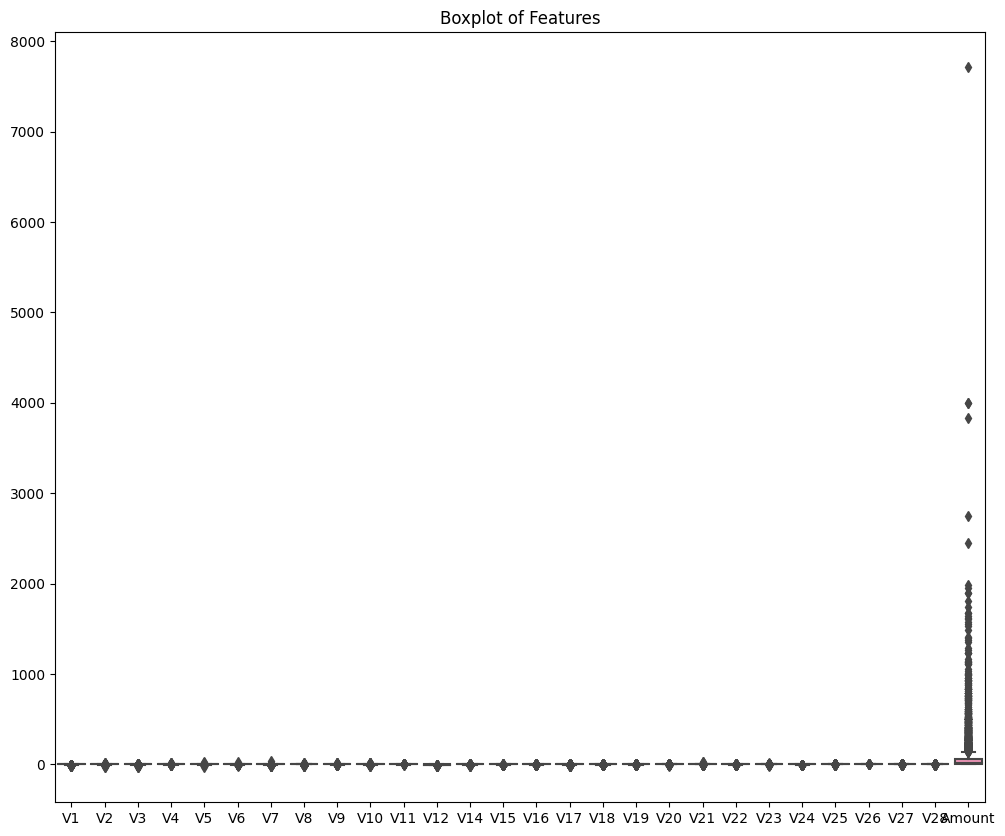

<ipython-input-7-348ccc64a8bd>:9: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_imputed.quantile(0.25)
<ipython-input-7-348ccc64a8bd>:10: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_imputed.quantile(0.75)
<ipython-input-7-348ccc64a8bd>:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_no_outliers = df_imputed[~((df_imputed < (Q1 - 1.5 * IQR)) | (df_imputed > (Q3 + 1.5 * IQR))).any(axis=1)]


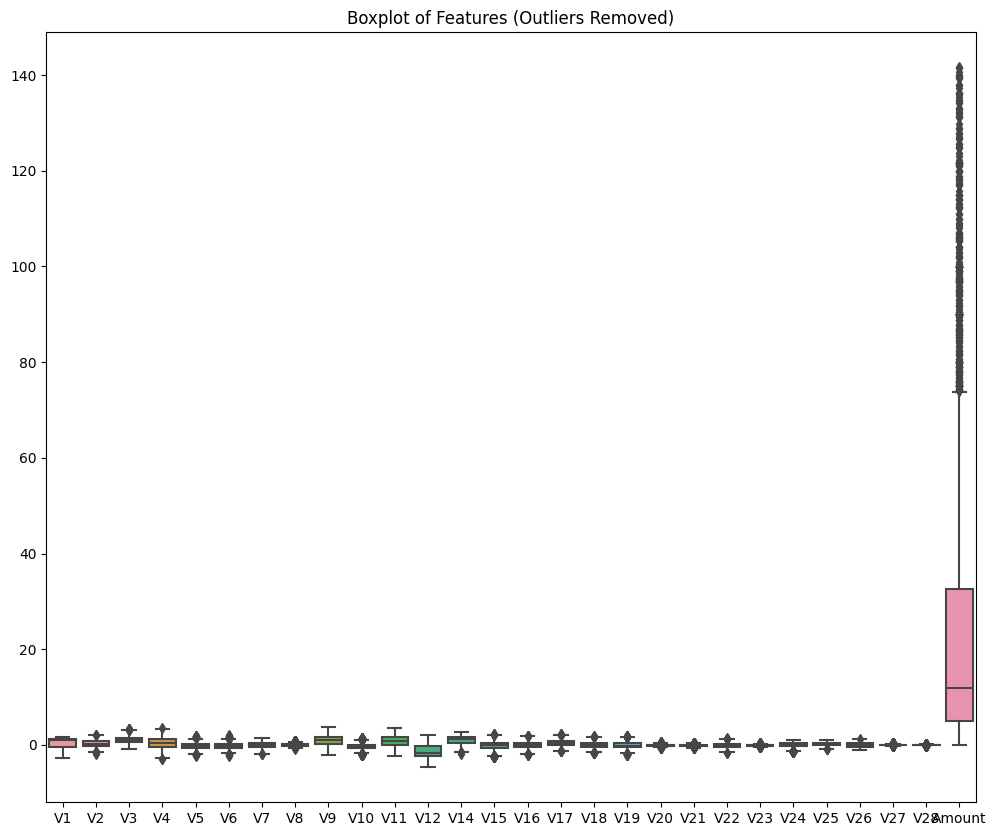


Cleaned DataFrame:
    Time        V1        V2        V3        V4        V5        V6        V7  \
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5     2 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6     4  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
9     9 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
5  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427 -0.232794   
6  0.081213  0.464960  ... -0.167716 -0.270710 -0.154104 -0.780055  0.750137   
9  0.069539 -0.736727  ... -0.246914 -0.633753 -0.120794 -0.385050 -0.069733   

        V26

In [7]:
#  outliers
# Visualize the distribution of features to identify outliers
plt.figure(figsize=(12, 10))
sns.boxplot(data=df_imputed.drop(['Time', 'Class'], axis=1))
plt.title("Boxplot of Features")
plt.show()

# Identify and handle outliers with IQR
Q1 = df_imputed.quantile(0.25)
Q3 = df_imputed.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df_no_outliers = df_imputed[~((df_imputed < (Q1 - 1.5 * IQR)) | (df_imputed > (Q3 + 1.5 * IQR))).any(axis=1)]

plt.figure(figsize=(12, 10))
sns.boxplot(data=df_no_outliers.drop(['Time', 'Class'], axis=1))
plt.title("Boxplot of Features (Outliers Removed)")
plt.show()


print("\nCleaned DataFrame:\n", df_no_outliers.head())

In [10]:

# Feature engineering

# convert time column to seconds :/60
df_imputed['Time_in_minutes'] = df_imputed['Time'] / 60

#  create a new feature 'Amount_per_transaction' to represent amount per transaction
df_imputed['Amount_per_transaction'] = df_imputed['Amount'] / df_imputed['V1']

print("\nDataFrame after feature engineering:\n", df_imputed.head())

# Standardisation

# Separate features( 'Class' is the target variable)
features_to_normalize = df_imputed.columns.difference(['Class'])
scaler = StandardScaler()

df_normalized = df_imputed.copy()
df_normalized[features_to_normalize] = scaler.fit_transform(df_normalized[features_to_normalize])

print("\nDataFrame after normalization:\n", df_normalized.head())



DataFrame after feature engineering:
    Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V23       V24       V25       V26       V27  \
0  0.098698  0.363787  ... -0.110474  0.066928  0.128539 -0.189115  0.133558   
1  0.085102 -0.255425  ...  0.101288 -0.339846  0.167170  0.125895 -0.008983   
2  0.247676 -1.514654  ...  0.909412 -0.689281 -0.327642 -0.139097 -0.055353   
3  0.377436 -1.387024  ... -0.190321 -1.175575  0.647376 -0.221929  0.062723   
4 -0.270533  0.817739  ... -0.137458  0.141267 -0.206010  0.502292  0.2194

In [15]:
print(df.describe())


               Time           V1           V2           V3           V4  \
count   5977.000000  5977.000000  5977.000000  5977.000000  5977.000000   
mean   10851.511293    -0.344706     0.305208     0.832995     0.375009   
std     9140.285829     1.879328     1.510037     1.733383     1.449688   
min        0.000000   -23.066842   -25.936137   -24.667741    -4.657545   
25%     1163.000000    -1.043068    -0.261913     0.395440    -0.557892   
50%     9087.000000    -0.361106     0.284236     0.999664     0.282236   
75%    21852.000000     1.146933     0.928869     1.629013     1.216616   
max    24759.000000     1.685314    10.558600     4.017561    11.844777   

                V5           V6           V7           V8           V9  ...  \
count  5977.000000  5977.000000  5977.000000  5977.000000  5977.000000  ...   
mean     -0.163813     0.050632    -0.130898    -0.014946     0.967339  ...   
std       1.408407     1.290759     1.324457     1.260711     1.284792  ...   
min     

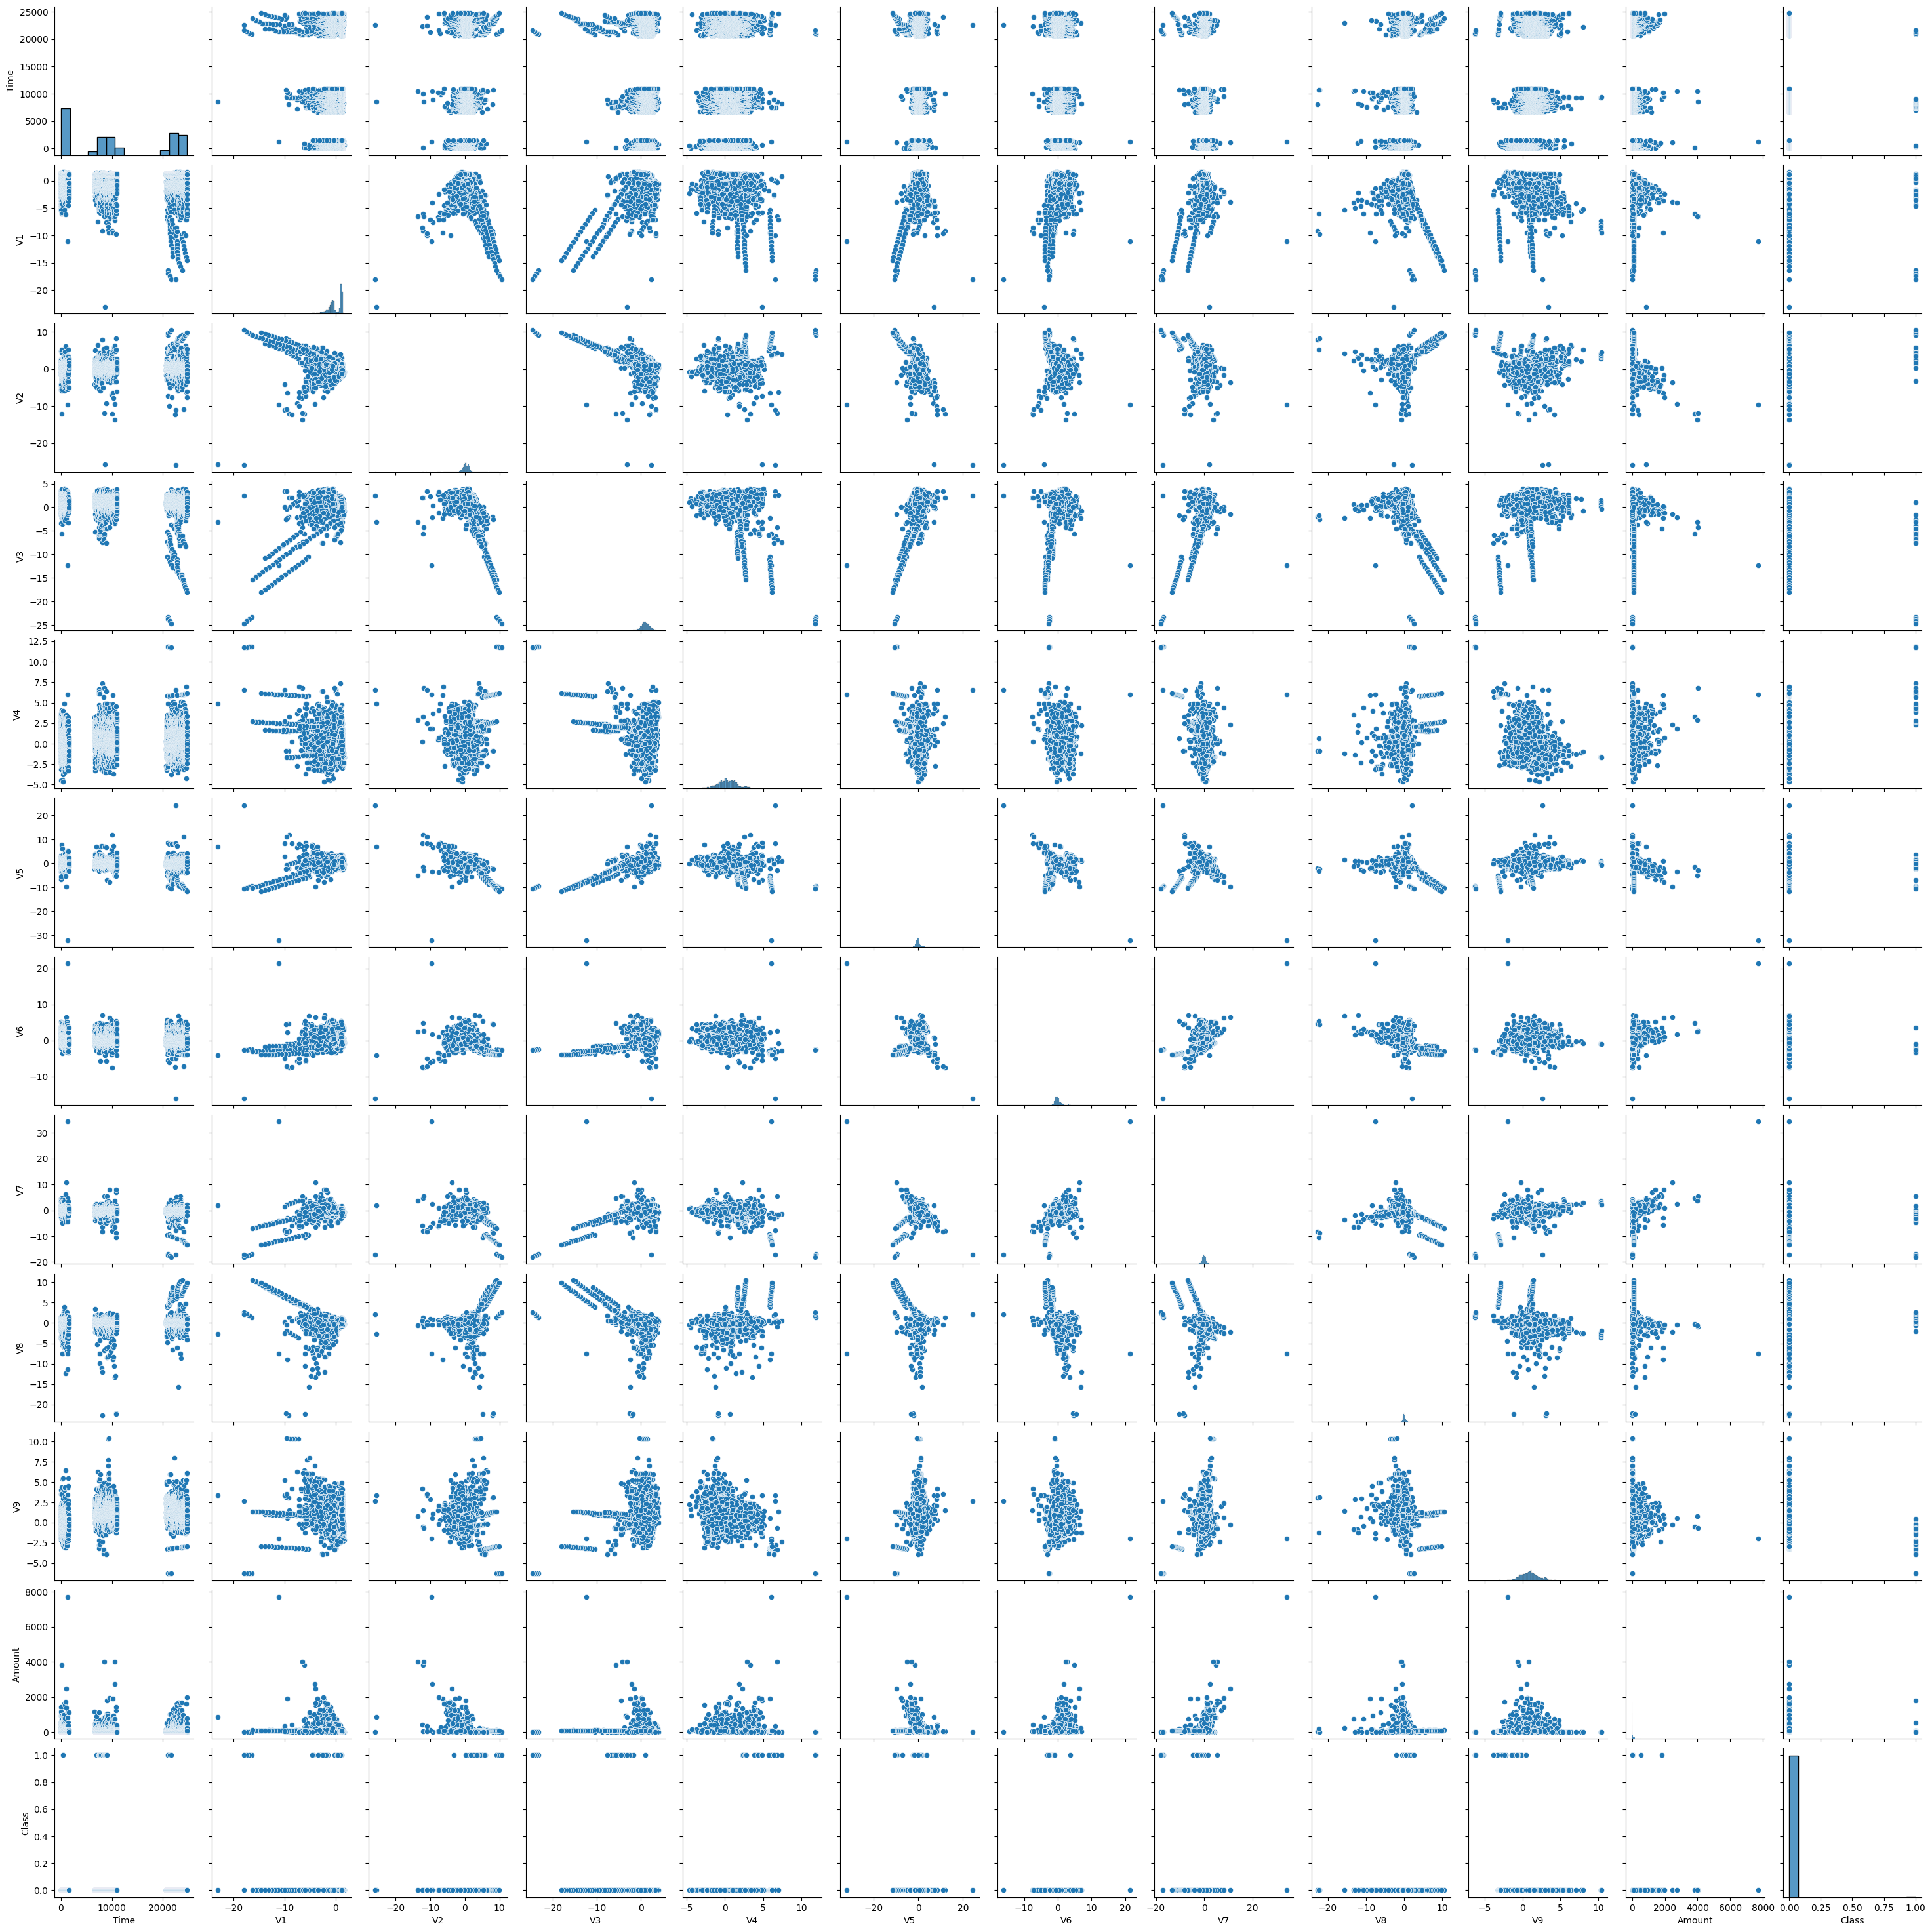

In [21]:
# Pair plot for selected features
selected_features = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'Amount', 'Class']
sns.pairplot(df[selected_features])
plt.show()

<ipython-input-16-01f6abc66ca0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000 -0.012289  0.013890 -0.074647  0.061039 -0.069482 -0.000252   
V1     -0.012289  1.000000 -0.257261  0.348883 -0.095989  0.111192  0.130545   
V2      0.013890 -0.257261  1.000000 -0.390963  0.135568 -0.244450 -0.057966   
V3     -0.074647  0.348883 -0.390963  1.000000 -0.237656  0.379662  0.106665   
V4      0.061039 -0.095989  0.135568 -0.237656  1.000000 -0.119825 -0.028339   
V5     -0.069482  0.111192 -0.244450  0.379662 -0.119825  1.000000  0.074535   
V6     -0.000252  0.130545 -0.057966  0.106665 -0.028339  0.074535  1.000000   
V7     -0.147372  0.237039 -0.109409  0.428416 -0.196409  0.128531  0.173666   
V8      0.084090 -0.119295  0.090477 -0.344005  0.125014 -0.178994 -0.132249   
V9      0.408172 -0.017756 -0.112047  0.202790 -0.247613  0.020149  0.047134   
V10    -0.186920 -0.050500  0.013619  0.281575 -0.067898  0.232315  0.107238   
V11     0.313073 -0.089278  0.115058 -0.

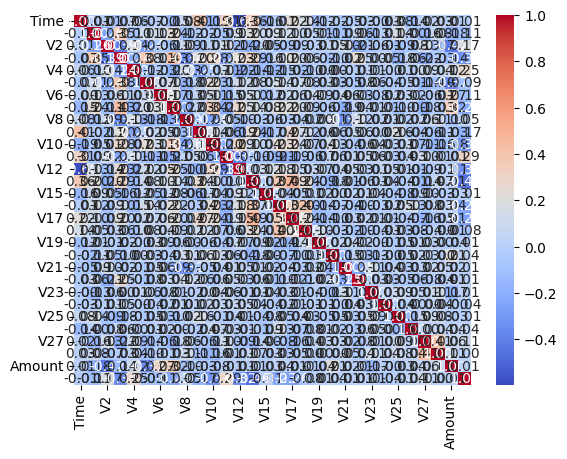

In [16]:
correlation_matrix = df.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [17]:
class_distribution = df['Class'].value_counts()
print("Class Distribution:\n", class_distribution)

Class Distribution:
 0.0    5949
1.0      28
Name: Class, dtype: int64
